## 시각화

### 라이브러리 호출

In [101]:
import pandas as pd

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [102]:
import numpy as np

In [103]:
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (25.0, 15.0)
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)



In [104]:
import seaborn as sns

### 전처리한 데이터 호출

In [105]:
tran_store = pd.read_csv('tran_store_1002.csv', encoding="CP949")
tran_point = pd.read_csv('tran_point_1002.csv', encoding='CP949')

In [106]:
tran_store.head()

,CLNN,APV_TS_D,TIME,MCT_N,CRD_TCD,APV_TCD,USE_AMT,POINT_USE,year,month,date,day,UPJONG_GB,MCT_ZPN
0,Z29855501931ST,20170724,18,88134201011KM,1,1,H,PA,2017,7,24,a월,홈/인터넷쇼핑,6168
1,Z20370901941ST,20170823,15,59475201053KM,0,1,C,PA,2017,8,23,c수,베이커리,16930
2,Z20370901941ST,20161012,21,93893200837KM,0,1,B,PA,2016,10,12,c수,베이커리,16930
3,Z20370901941ST,20161012,20,47233200528KM,0,1,B,PA,2016,10,12,c수,카페,6761
4,Z20370901941ST,20161012,13,47233200528KM,0,1,B,PA,2016,10,12,c수,카페,6761


In [107]:
tran_point.head()

,CLNN,APV_TS_D,TIME,MCT_N,CRD_TCD,APV_TCD,USE_AMT,POINT_USE,year,month,date,day,MA_PNT_2,M12_SE_PNT_2
0,Z29855501931ST,20170724,18,88134201011KM,1,1,H,PA,2017,7,24,a월,PB,PA
1,Z20370901941ST,20170823,15,59475201053KM,0,1,C,PA,2017,8,23,c수,PA,PE
2,Z20370901941ST,20161012,21,93893200837KM,0,1,B,PA,2016,10,12,c수,PA,PE
3,Z20370901941ST,20161012,20,47233200528KM,0,1,B,PA,2016,10,12,c수,PA,PE
4,Z20370901941ST,20161012,13,47233200528KM,0,1,B,PA,2016,10,12,c수,PA,PE


In [108]:
print(np.shape(tran_point), np.shape(tran_store) )

(1002213, 14) (1002213, 14)


#### 결제금액, 결제유형 확인

In [109]:
tran_store.CRD_TCD.value_counts()

1    844004
0    158209
Name: CRD_TCD, dtype: int64

In [110]:
tran_store.APV_TCD.value_counts()

1    997550
2      3966
3       697
Name: APV_TCD, dtype: int64

In [111]:
tran_store.MCT_ZPN.value_counts() 

4637      65844
4353      27207
13494     24241
8377      17440
7071      16027
7320       9513
4389       9340
4763       8806
4509       8306
4117       8093
31538      7674
4533       7455
6261       6979
6236       6657
8376       6569
13487      6079
6703       5659
4760       5539
31537      5362
4513       5327
27478      5077
3760       5047
6545       4868
120750     4450
24341      4271
13606      4209
31253      4184
3766       3718
4620       3644
58553      3510
4539       3474
38067      3293
36728      3289
4323       3166
27128      3114
4750       2810
8212       2792
4762       2711
16455      2579
5554       2508
27136      2478
150802     2352
24289      2341
16227      2210
15588      2164
8389       2159
15587      2158
28504      2133
16622      2117
22382      2109
13591      2102
7258       2061
38066      1954
28680      1943
30114      1925
13992      1849
6164       1816
15577      1784
5551       1781
15361      1775
18321      1763
134838     1749
5021    

### bar plot 

#### 시간대별 거래건수

In [112]:
plt.rcParams["font.family"]

['Malgun Gothic']

In [113]:
tran_time = tran_store.TIME.value_counts()

In [114]:
time_x = list(tran_time.index)
time_y = list(tran_time)

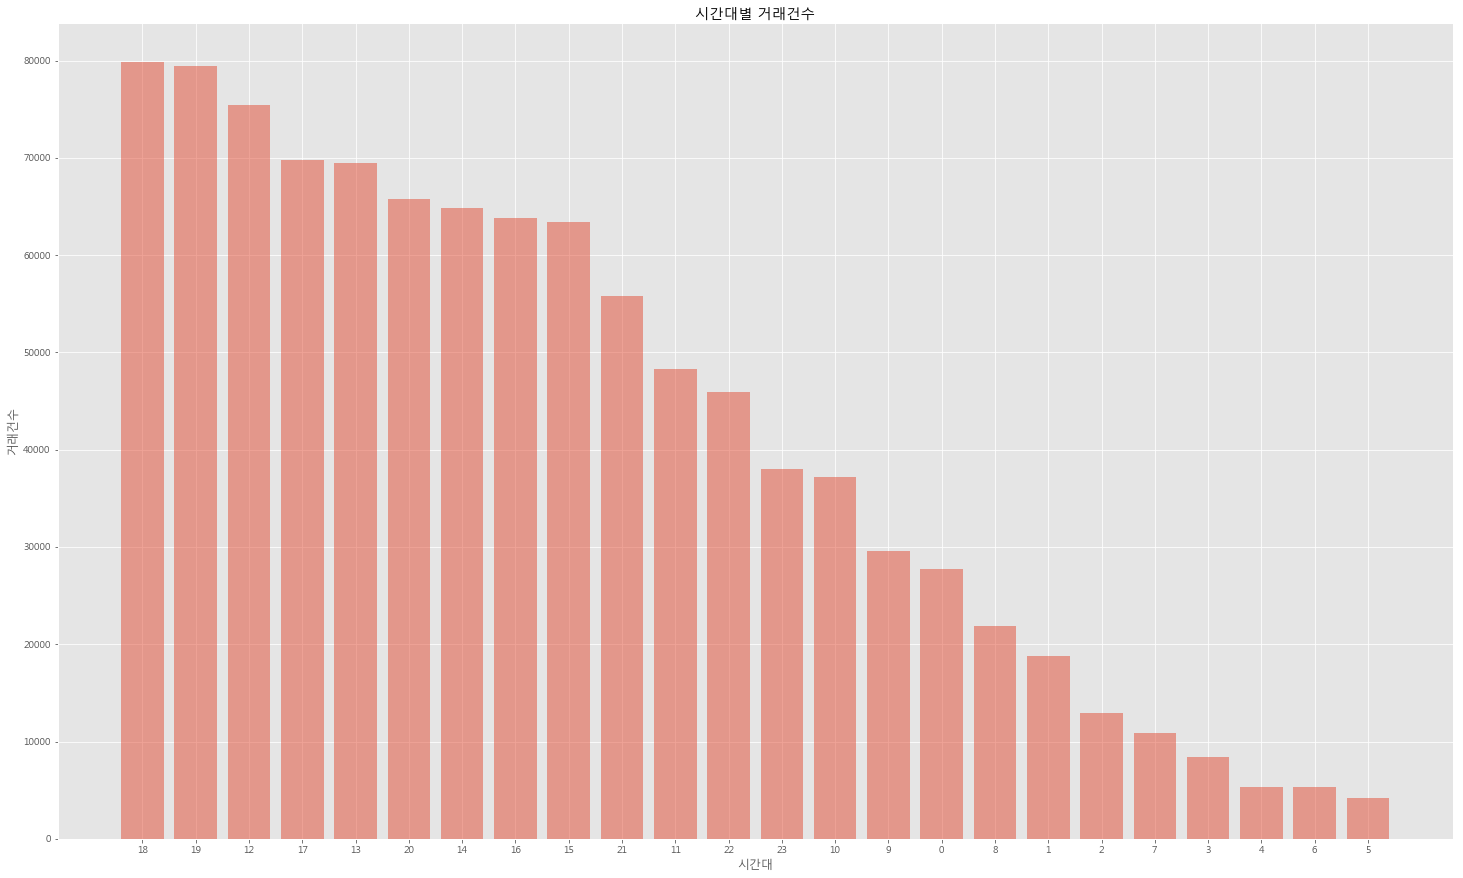

In [115]:
plt.bar(np.arange(len(time_x)), time_y, align='center', alpha=0.5)
plt.xticks(np.arange(len(time_x)),time_x)
plt.ylabel('거래건수')
plt.xlabel('시간대')
plt.title('시간대별 거래건수')

plt.show()

#### 업종별 거래건수

In [116]:
tran_kinds = tran_store.UPJONG_GB.value_counts()

In [117]:
kinds_x = list(tran_kinds.index)
kinds_y = list(tran_kinds)

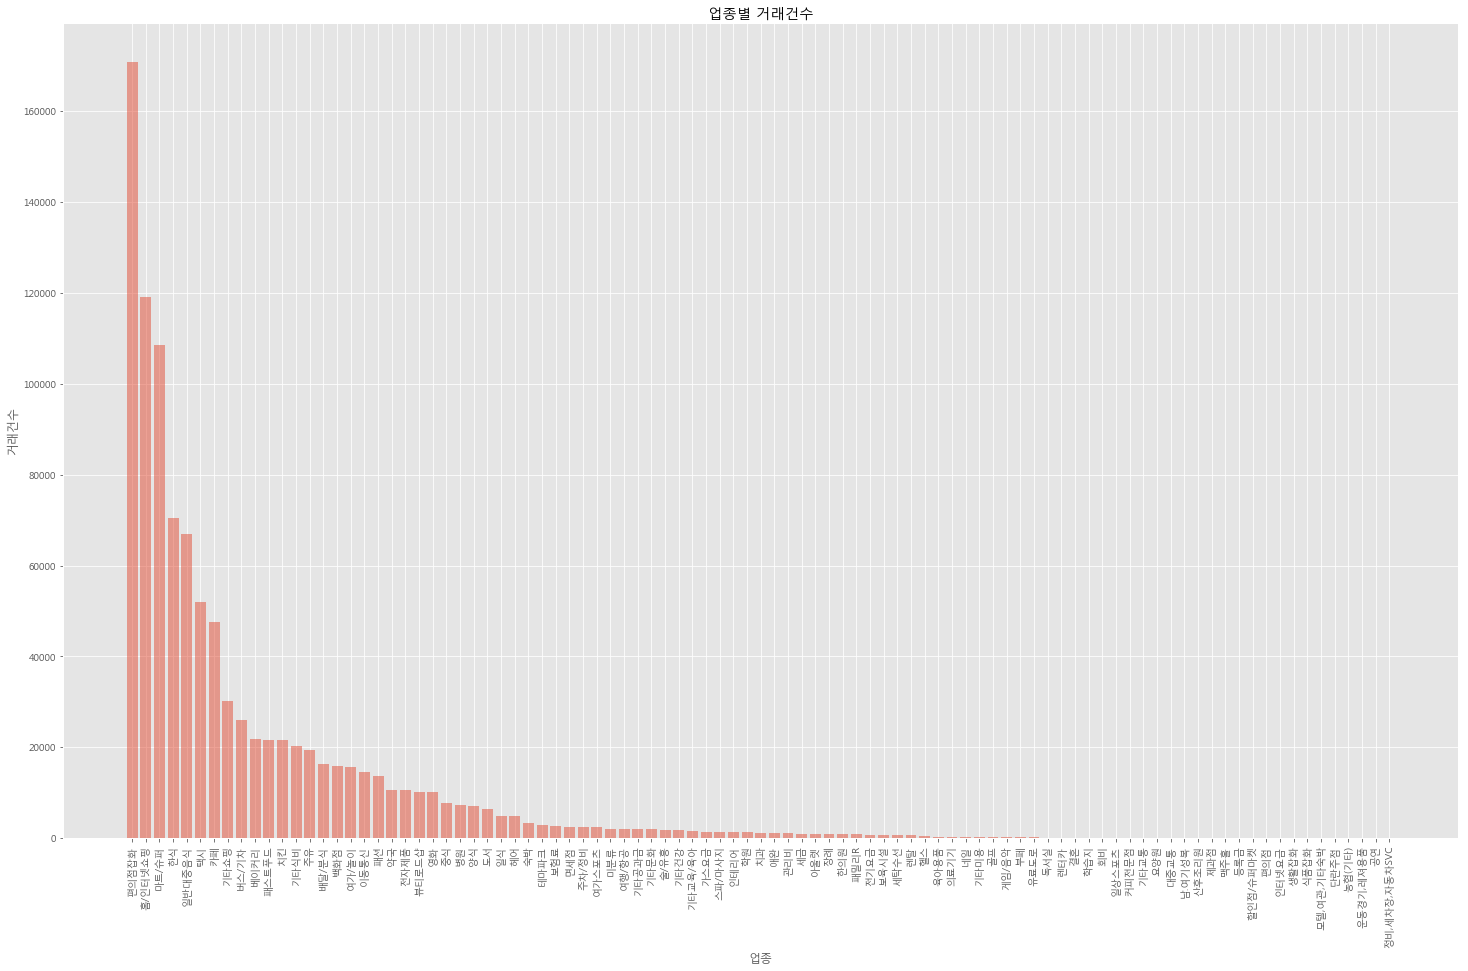

In [118]:
plt.bar(np.arange(len(kinds_x)), kinds_y, align='center', alpha=0.5)

plt.xticks(np.arange(len(kinds_x)),kinds_x,rotation=90)
plt.ylabel('거래건수')
plt.xlabel('업종')
plt.title('업종별 거래건수')

plt.show()

#### 월별 업종별 건수 히트맵

##### 업종 확인

In [119]:
tran_store.UPJONG_GB.value_counts()

편의점잡화            170909
홈/인터넷쇼핑          119059
마트/슈퍼            108576
한식                70562
일반대중음식            66902
택시                52008
카페                47604
기타쇼핑              30116
버스/기차             26004
베이커리              21810
패스트푸드             21586
치킨                21512
기타식비              20318
주유                19399
배달/분식             16363
백화점               15815
여가/놀이             15601
이동통신              14462
패션                13779
약국                10654
전자제품              10573
뷰티로드샵             10142
영화                10076
중식                 7781
병원                 7212
양식                 7168
도서                 6409
일식                 4931
헤어                 4903
숙박                 3304
테마파크               2813
보험료                2752
면세점                2528
주차/정비              2432
여가스포츠              2420
미분류                2073
여행/항공              1946
기타공과금              1923
기타문화               1920
술/유흥               1879
기타건강               1851
기타교육/육아         

In [120]:
month_upjong = tran_store[['month','UPJONG_GB']]

In [121]:
month_upjong.head()

,month,UPJONG_GB
0,7,홈/인터넷쇼핑
1,8,베이커리
2,10,베이커리
3,10,카페
4,10,카페


In [122]:
def upjong_by_month(str):
    print(month_upjong.loc[lambda x : x.UPJONG_GB==str].month.value_counts())

##### 체크할 업종 선택

In [123]:
upjong_list = ['도서','학원','학습지','카페','여가스포츠','여가/놀이','여행/항공','숙박','테마파크']

##### 업종별 카운트

In [124]:
for i in upjong_list:
    print(i)
    upjong_by_month(i)
    print('=============')

도서
9     1188
3     1045
12     579
10     570
11     524
1      490
2      456
4      381
8      374
5      339
6      245
7      218
Name: month, dtype: int64
학원
1     146
11    134
9     131
12    129
10    120
4     120
3     110
2     101
7     100
6      85
5      85
8      68
Name: month, dtype: int64
학습지
12    14
4     10
10     6
9      6
8      6
7      6
6      6
11     5
3      4
1      4
5      3
2      2
Name: month, dtype: int64
카페
10    6039
9     5979
12    5399
11    5379
3     4222
1     4219
2     3982
4     3782
5     3385
8     1923
6     1810
7     1485
Name: month, dtype: int64
여가스포츠
9     280
12    267
1     263
10    246
2     221
5     218
11    199
3     178
4     178
6     138
8     125
7     107
Name: month, dtype: int64
여가/놀이
12    1934
10    1762
9     1727
11    1669
1     1527
3     1403
2     1390
5     1180
4     1110
8      731
6      655
7      513
Name: month, dtype: int64
여행/항공
1     226
12    185
2     183
3     169
7     167
4     166
11    162

##### 도서 업종확인, sort

In [125]:
month_upjong.loc[lambda x : x.UPJONG_GB=='도서'].month.value_counts()

9     1188
3     1045
12     579
10     570
11     524
1      490
2      456
4      381
8      374
5      339
6      245
7      218
Name: month, dtype: int64

In [126]:
month_upjong.loc[lambda x : x.UPJONG_GB=='도서'].month.value_counts().sort_index()

1      490
2      456
3     1045
4      381
5      339
6      245
7      218
8      374
9     1188
10     570
11     524
12     579
Name: month, dtype: int64

##### 월별, 업종별 카운트 DF생성

In [127]:
monthindex_upjong = pd.DataFrame()

In [128]:
for i in upjong_list:
    monthindex_upjong[i] = month_upjong.loc[lambda x : x.UPJONG_GB==i].month.value_counts().sort_index()

In [129]:
monthindex_upjong

,도서,학원,학습지,카페,여가스포츠,여가/놀이,여행/항공,숙박,테마파크
1,490,146,4,4219,263,1527,226,354,217
2,456,101,2,3982,221,1390,183,341,195
3,1045,110,4,4222,178,1403,169,268,273
4,381,120,10,3782,178,1110,166,229,207
5,339,85,3,3385,218,1180,155,209,247
6,245,85,6,1810,138,655,124,138,129
7,218,100,6,1485,107,513,167,143,120
8,374,68,6,1923,125,731,149,234,132
9,1188,131,6,5979,280,1727,137,358,350
10,570,120,6,6039,246,1762,123,347,358


In [130]:
target_col = list(monthindex_upjong.columns)

In [131]:
weight_col = monthindex_upjong[target_col].max()

In [132]:
monthindex_upjong_count_norm = monthindex_upjong[target_col]/weight_col

In [133]:
monthindex_upjong_count_norm

,도서,학원,학습지,카페,여가스포츠,여가/놀이,여행/항공,숙박,테마파크
1,0.412458,1.000000,0.285714,0.698626,0.939286,0.789555,1.000000,0.988827,0.606145
2,0.383838,0.691781,0.142857,0.659381,0.789286,0.718718,0.809735,0.952514,0.544693
3,0.879630,0.753425,0.285714,0.699122,0.635714,0.725440,0.747788,0.748603,0.762570
4,0.320707,0.821918,0.714286,0.626263,0.635714,0.573940,0.734513,0.639665,0.578212
5,0.285354,0.582192,0.214286,0.560523,0.778571,0.610134,0.685841,0.583799,0.689944
6,0.206229,0.582192,0.428571,0.299718,0.492857,0.338676,0.548673,0.385475,0.360335
7,0.183502,0.684932,0.428571,0.245902,0.382143,0.265253,0.738938,0.399441,0.335196
8,0.314815,0.465753,0.428571,0.318430,0.446429,0.377973,0.659292,0.653631,0.368715
9,1.000000,0.897260,0.428571,0.990065,1.000000,0.892968,0.606195,1.000000,0.977654
10,0.479798,0.821918,0.428571,1.000000,0.878571,0.911065,0.544248,0.969274,1.000000


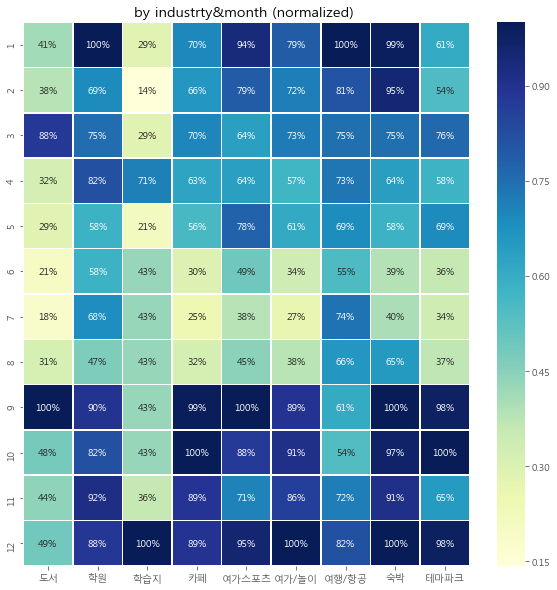

In [134]:
plt.figure(figsize=(10,10))
sns.heatmap(monthindex_upjong_count_norm , annot=True, fmt='.0%', linewidths=.5, cmap='YlGnBu')
plt.title('by industrty&month (normalized) ')
plt.show()

### 요일별 업종별 히트맵

In [135]:
day_upjong = tran_store[['day','UPJONG_GB']]

In [136]:
day_upjong.head()

,day,UPJONG_GB
0,a월,홈/인터넷쇼핑
1,c수,베이커리
2,c수,베이커리
3,c수,카페
4,c수,카페


In [192]:
day_upjong_list = ['치킨','술/유흥','영화','여가스포츠','여가/놀이','테마파크','택시','카페','헤어','패션','홈/인터넷쇼핑','전자제품','기타쇼핑','학원','도서']

In [193]:
def upjong_by_day(str):
    print(day_upjong.loc[lambda x : x.UPJONG_GB==str].day.value_counts())

In [194]:
for i in day_upjong_list:
    print(i)
    upjong_by_day(i)
    print('=============')

치킨
f토    3250
d목    3187
e금    3172
g일    3164
c수    3071
b화    2877
a월    2791
Name: day, dtype: int64
술/유흥
f토    421
g일    382
e금    295
d목    204
c수    201
a월    196
b화    180
Name: day, dtype: int64
영화
f토    1870
g일    1606
e금    1546
d목    1427
c수    1374
b화    1136
a월    1117
Name: day, dtype: int64
여가스포츠
f토    555
g일    436
e금    358
c수    283
d목    269
b화    263
a월    256
Name: day, dtype: int64
여가/놀이
f토    2661
e금    2494
g일    2432
d목    2139
b화    1974
a월    1955
c수    1946
Name: day, dtype: int64
테마파크
f토    539
e금    433
d목    412
b화    385
a월    359
c수    343
g일    342
Name: day, dtype: int64
택시
f토    8804
e금    8034
g일    7713
d목    7150
a월    6949
c수    6779
b화    6579
Name: day, dtype: int64
카페
f토    7055
e금    6997
d목    6979
b화    6864
c수    6607
a월    6579
g일    6523
Name: day, dtype: int64
헤어
f토    865
e금    737
g일    692
d목    670
c수    658
a월    651
b화    630
Name: day, dtype: int64
패션
f토    2543
e금    2253
g일    2098
d목    1830
c수    1697
b화    1680
a월    1678
Na

##### 월별, 업종별 카운트 DF생성

In [195]:
dayindex_upjong = pd.DataFrame()

In [196]:
for i in day_upjong_list:
    dayindex_upjong[i] = day_upjong.loc[lambda x : x.UPJONG_GB==i].day.value_counts().sort_index()

In [197]:
dayindex_upjong

,치킨,술/유흥,영화,여가스포츠,여가/놀이,테마파크,택시,카페,헤어,패션,홈/인터넷쇼핑,전자제품,기타쇼핑,학원,도서
a월,2791,196,1117,256,1955,359,6949,6579,651,1678,18905,1829,4477,258,1108
b화,2877,180,1136,263,1974,385,6579,6864,630,1680,18274,1690,4407,218,1031
c수,3071,201,1374,283,1946,343,6779,6607,658,1697,17397,1683,4247,214,935
d목,3187,204,1427,269,2139,412,7150,6979,670,1830,17376,1610,4461,203,1018
e금,3172,295,1546,358,2494,433,8034,6997,737,2253,16948,1566,4463,214,886
f토,3250,421,1870,555,2661,539,8804,7055,865,2543,14757,1167,4329,135,733
g일,3164,382,1606,436,2432,342,7713,6523,692,2098,15402,1028,3732,87,698


In [198]:
day_target_col = list(dayindex_upjong.columns)

In [199]:
day_weight_col = dayindex_upjong[day_target_col].max()

In [200]:
dayindex_upjong_count_norm = dayindex_upjong[day_target_col]/day_weight_col

In [201]:
dayindex_upjong_count_norm

,치킨,술/유흥,영화,여가스포츠,여가/놀이,테마파크,택시,카페,헤어,패션,홈/인터넷쇼핑,전자제품,기타쇼핑,학원,도서
a월,0.858769,0.465558,0.597326,0.461261,0.734686,0.666048,0.789300,0.932530,0.752601,0.659851,1.000000,1.000000,1.000000,1.000000,1.000000
b화,0.885231,0.427553,0.607487,0.473874,0.741826,0.714286,0.747274,0.972927,0.728324,0.660637,0.966623,0.924002,0.984365,0.844961,0.930505
c수,0.944923,0.477435,0.734759,0.509910,0.731304,0.636364,0.769991,0.936499,0.760694,0.667322,0.920233,0.920175,0.948626,0.829457,0.843863
d목,0.980615,0.484561,0.763102,0.484685,0.803833,0.764378,0.812131,0.989227,0.774566,0.719622,0.919122,0.880262,0.996426,0.786822,0.918773
e금,0.976000,0.700713,0.826738,0.645045,0.937242,0.803340,0.912540,0.991779,0.852023,0.885961,0.896482,0.856206,0.996873,0.829457,0.799639
f토,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.780587,0.638054,0.966942,0.523256,0.661552
g일,0.973538,0.907363,0.858824,0.785586,0.913942,0.634508,0.876079,0.924592,0.800000,0.825010,0.814705,0.562056,0.833594,0.337209,0.629964


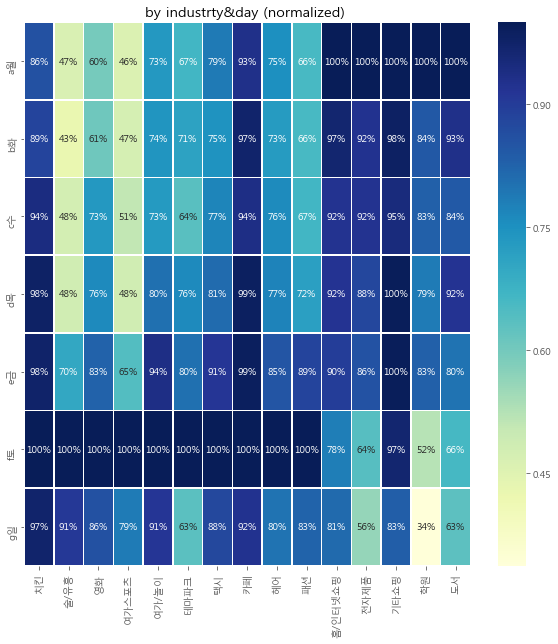

In [202]:
plt.figure(figsize=(10,10))
sns.heatmap(dayindex_upjong_count_norm , annot=True, fmt='.0%', linewidths=.5, cmap='YlGnBu')
plt.title('by industrty&day (normalized) ')
plt.show()